<a href="https://colab.research.google.com/github/ChintzRuparel/Image-Processing/blob/main/IP_Expt_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment No : 8 Discrete Fourier Transform <br>


Aim: <br>
1.	Compute the DFT of the image and plot its Magnitude and Phase Spectrum
2.	Implement low pass and high pass filtering in frequency domain using DFT and comment on the subjective quality of the reconstructed image.


In [ ]:
import cv2
from sympy import fft, ifft
import numpy as np
import matplotlib.pyplot as plt

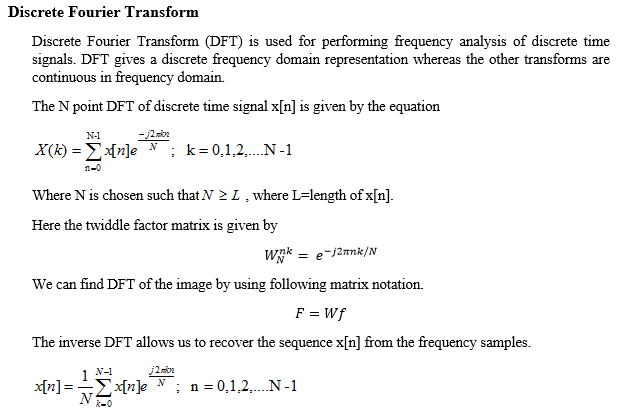

Example : 

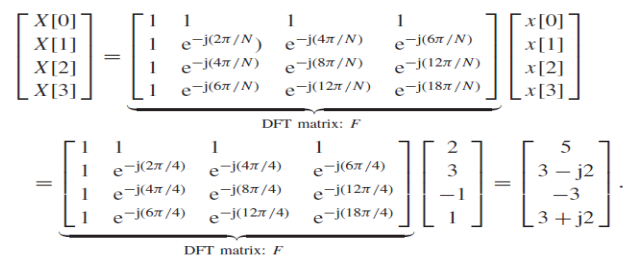

In [ ]:
x=[2,3,-1,1]
X=np.fft.fft(x)
print('DFT of x(n)=',X)
x=np.fft.ifft(X)
print('Recovered x(n)=',x)

   

DFT of x(n)= [ 5.+0.j  3.-2.j -3.+0.j  3.+2.j]
Recovered x(n)= [ 2.+0.j  3.+0.j -1.+0.j  1.+0.j]


compute FFT using built in function

[2, 3, -1, 1]


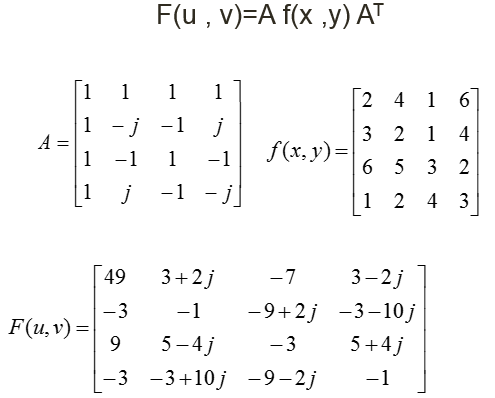

In [ ]:
x=[[2,4,1,6],[3,2,1,4],[6,5,3,2],[1,2,4,3]]
X=np.fft.fft2(x)
print('DFT of x(n)=',X)
x=np.fft.ifft(X)
print('Recovered x(n)=',x)





DFT of x(n)= [[49. +0.j  3. +2.j -7. +0.j  3. -2.j]
 [-3. +0.j -1. +0.j -9. +2.j -3.-10.j]
 [ 9. +0.j  5. -4.j -3. +0.j  5. +4.j]
 [-3. +0.j -3.+10.j -9. -2.j -1. +0.j]]
Recovered x(n)= [[12.+0.j 13.+0.j  9.+0.j 15.+0.j]
 [-4.-2.j -1.+0.j -2.+3.j  4.-1.j]
 [ 4.+0.j  5.+0.j -1.+0.j  1.+0.j]
 [-4.+2.j -1.+0.j -2.-3.j  4.+1.j]]


To center the DFT <br>
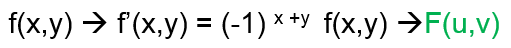

Log transform 

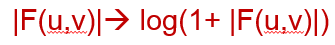

In [ ]:
x=[[2,4,1,6],[3,2,1,4],[6,5,3,2],[1,2,4,3]]
X=np.fft.fft2(x)
Xc=np.fft.fftshift(X)
print('Centered DFT=',Xc)

Centered DFT= [[-3. +0.j  5. +4.j  9. +0.j  5. -4.j]
 [-9. -2.j -1. +0.j -3. +0.j -3.+10.j]
 [-7. +0.j  3. -2.j 49. +0.j  3. +2.j]
 [-9. +2.j -3.-10.j -3. +0.j -1. +0.j]]


Inverse FFT of x = 
[[2.+0.j 4.+0.j 1.+0.j 6.+0.j]
 [3.+0.j 2.+0.j 1.+0.j 4.+0.j]
 [6.+0.j 5.+0.j 3.+0.j 2.+0.j]
 [1.+0.j 2.+0.j 4.+0.j 3.+0.j]]


# To compute the DFT of a image

Text(0.5, 1.0, 'Transformed Image')

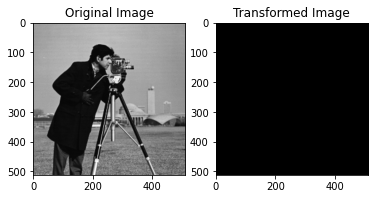

In [ ]:
# Read the image
img = cv2.imread("cameraman.tif", 0)
# Compute the FFT 
imgfft = np.fft.fft2(img)
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.title("Original Image")
plt.subplot(122)
plt.imshow(np.abs(imgfft), cmap = 'gray')
plt.title("Transformed Image")

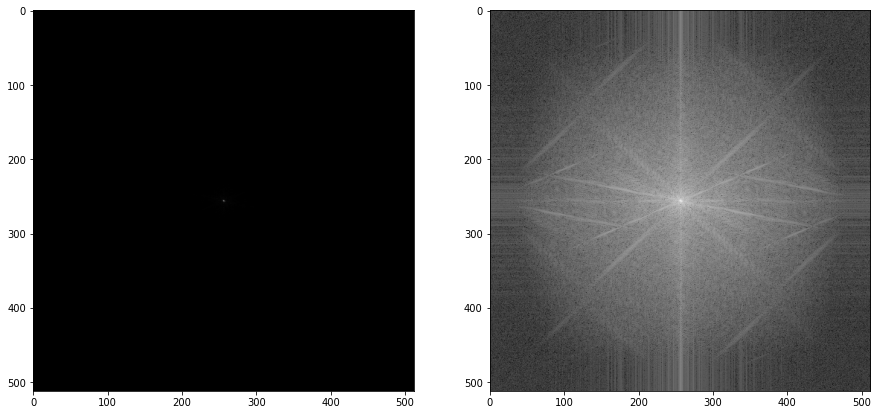

In [ ]:
#Shift the origin. Equvalent to multiplying by (-1)^x+y
fftcen=np.fft.fftshift(imgfft)
plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(np.abs(fftcen),cmap='gray')
fftlog=np.log(1+fftcen)
plt.subplot(122)
plt.imshow(np.abs(fftlog),cmap='gray')
# compute the Magnitude spectrum of the transformed image


# Compute the Phase spectrum of the transformed image


# Compute the log of magnitude for clear visualization



Plot the image, magnitude spectrun, phase spectrum, log transformed magnitude spectrum

Text(0.5, 1.0, 'Phase Spectrum')

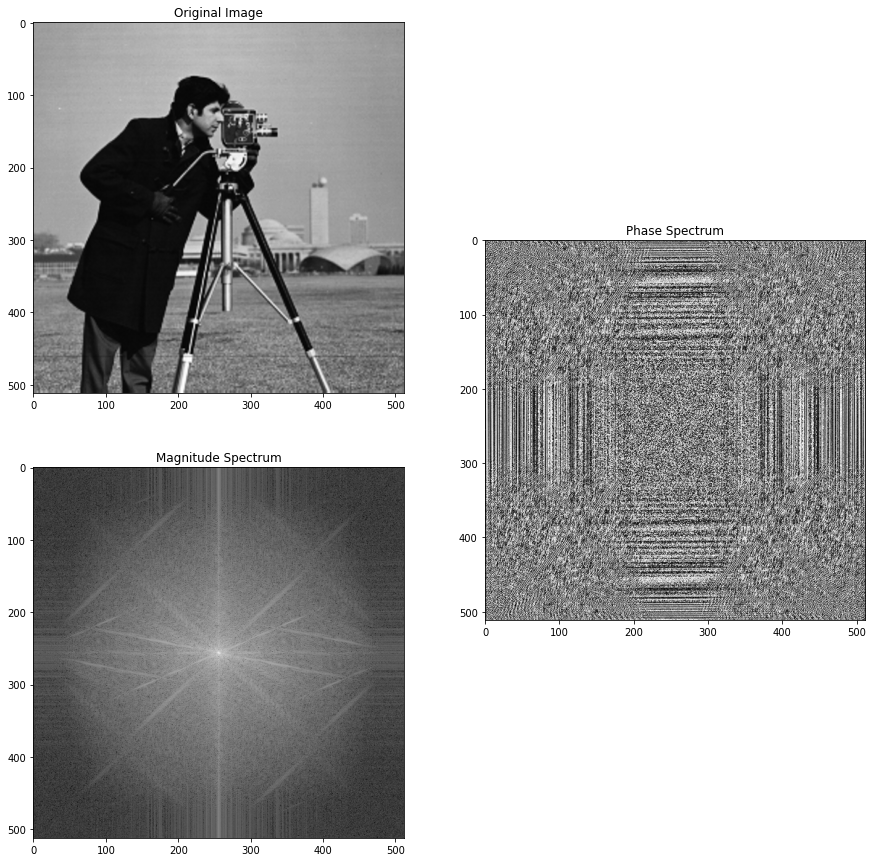

In [ ]:
fftphase=np.angle(imgfft)
plt.figure(figsize=(15,15))
plt.subplot(221)
plt.imshow(img, cmap = 'gray')
plt.title("Original Image")
plt.subplot(222)
plt.imshow(np.abs(imgfft), cmap = 'gray')
plt.title("Transformed Image")
plt.subplot(223)
plt.imshow(np.abs(fftlog), cmap = 'gray')
plt.title("Magnitude Spectrum")
plt.subplot(122)
plt.imshow(np.abs(fftphase), cmap = 'gray')
plt.title("Phase Spectrum")



Filtering the low frequency and the high frequency components of an image

Develop a ideal LPF and HPF mask <br>
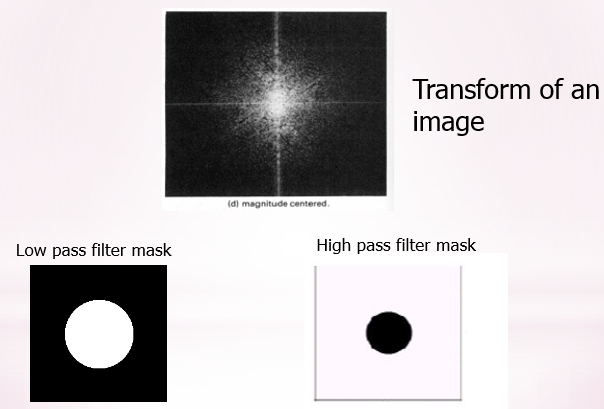

Text(0.5, 1.0, 'HPF')

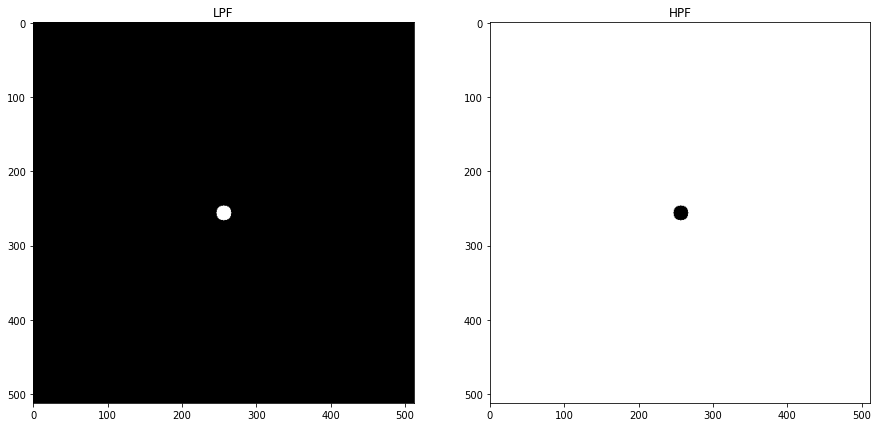

In [18]:
# Compute the rows and columns of the image
r,c=img.shape
# copy the image as a lpf and hpf variable
lpf=img.copy()
hpf=img.copy()
#Take radii d0= 10, 30,60,160,460
d=10
#Creat an ideal lpf and ideal hpf masks
for i in range(r):
  for j in range(c):
    d1=np.sqrt((i-r//2)**2+(j-c//2)**2)
    if d1>d:
      lpf[i,j]=0
      hpf[i,j]=1
    else:
      lpf[i,j]=1
      hpf[i,j]=0


#Plot orinal, low pass filtered and high pass filtered image

plt.figure(figsize=(15,15))
#Plot orinal, low pass filtered and high pass filtered image
plt.subplot(121)
plt.imshow(lpf, cmap = 'gray')
plt.title("LPF")
plt.subplot(122)
plt.imshow(hpf, cmap = 'gray')
plt.title("HPF")


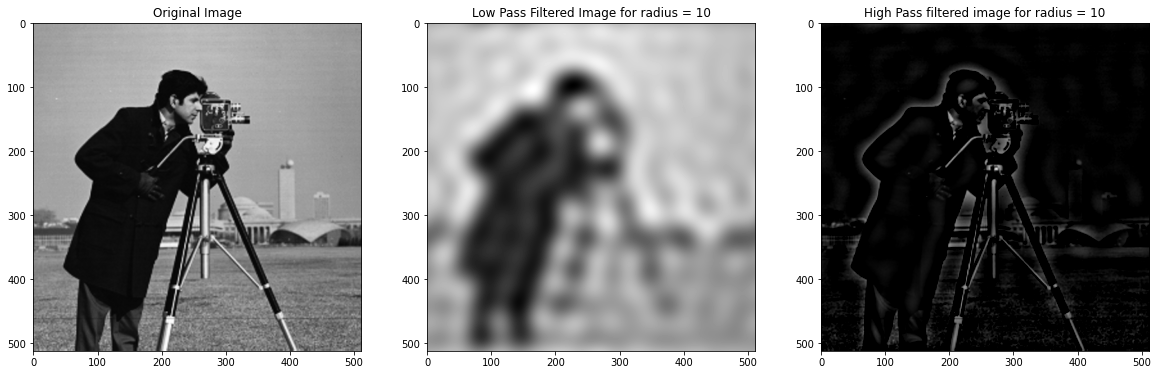

In [ ]:
# multiply lpf mask with the fft image


# shift the fft 


# Compute the inverse fft of the resultant filtered image


# multiply hpf mask with the fft image


# shift the fft


# Compute the inverse fft of the resultant filtered image


#Plot orinal, low pass filtered and high pass filtered image




# Conclusion :